### Gaussian Radial Basis Function

In this worksheet we expore a technique for transforming the columns of a dataset.

Suppose $\mathcal{X} = \mathbb{R}^d$.

Let $\bar{l} \in \mathbb{R}^d$.  

We think of $\bar{l}$ as a "landmark".  

It might be one of the datapoints in the training set.  

Now for each $\bar{x} \in \mathcal{X}$ we can produce a new feature column:

$\phi_\gamma(\bar{x},\bar{l}) = \exp(-\gamma |\!| \bar{x}-\bar{l} |\!|^2)$

The meaning of $\phi_\gamma(\bar{x},\bar{l})$ is a kind of distance between $\bar{x}$ and $\bar{l}$. 

It is not euclidean distance -- it weights points close to $\bar{l}$ exponentially higher than more distant points (depending on $\gamma$).

This gives a way of transforming the feature space.

For $k$ landmarks $\bar{l}_1,\bar{l}_2,\ldots,\bar{l}_k$, we can do the transformation

$$\bar{x} \mapsto [\phi_\gamma(\bar{x},\bar{l}_1),\phi_\gamma(\bar{x},\bar{l}_2),\ldots,\phi_\gamma(\bar{x},\bar{l}_k)]$$

Below we do an example with $d = k = 2$.


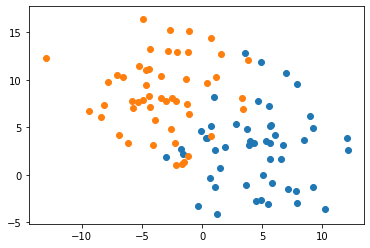

In [8]:
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs
import numpy as np

X,y = make_blobs(centers=2,random_state=42,cluster_std=4)
#X,y = make_moons(noise=0.1)
y = y*2-1


import matplotlib.pyplot as plt

Xa = X[y==1]
Xb = X[y==-1]
plt.scatter(Xa[:,0],Xa[:,1])
plt.scatter(Xb[:,0],Xb[:,1])
plt.show()

In [9]:
shuff = np.random.permutation(X.shape[0])
X = X[shuff]
y = y[shuff]
lm1 = np.mean(Xa,axis=0)
lm2 = np.mean(Xb,axis=0)
import numpy as np
def rbf(x,lm1,lm2,gamma=1):
    dim1 = np.exp(-gamma*np.sum((x-lm1)**2))
    dim2 = np.exp(-gamma*np.sum((x-lm2)**2))
    return np.array([dim1,dim2])

def RBF(X,lm1,lm2,gamma=1):
    Z = np.zeros_like(X)
    for i,x in enumerate(X):
        Z[i] = rbf(x,lm1,lm2,gamma)
    return np.array(Z)



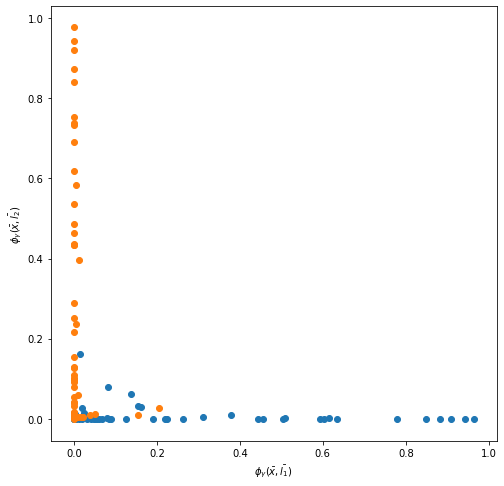

In [10]:
Z = RBF(X,lm1,lm2,gamma=.1)
Za = Z[y==1]
plt.figure(figsize=(8,8))
Zb = Z[y==-1]
plt.scatter(Za[:,0],Za[:,1])
plt.scatter(Zb[:,0],Zb[:,1])
plt.xlabel(r"$\phi_\gamma(\bar{x},\bar{l_1})$")
plt.ylabel(r"$\phi_\gamma(\bar{x},\bar{l_2})$")
plt.show()

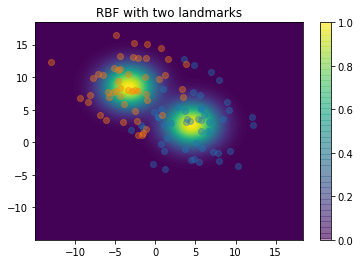

In [11]:
x = np.linspace(np.min(X)-2,np.max(X)+2,100)
y = np.linspace(np.min(X)-2,np.max(X)+2,100)
a,b = np.meshgrid(x,y)
dom = np.c_[a.ravel(),b.ravel()]
gamma=0.1
z = np.exp(-gamma*np.sum((dom-lm1)**2,axis=1))
z += np.exp(-gamma*np.sum((dom-lm2)**2,axis=1))

plt.contourf(dom[:,0].reshape(a.shape),dom[:,1].reshape(b.shape),z.reshape(a.shape),levels=100)
plt.scatter(Xa[:,0],Xa[:,1],alpha=0.4)
plt.scatter(Xb[:,0],Xb[:,1],alpha=0.4)
plt.colorbar()
plt.title("RBF with two landmarks")
plt.show()

In [27]:
import numpy as np
def rbf(x,landmarks,gamma=1):
    dims = []
    for lm in landmarks:
        new_dim = np.exp(-gamma*np.sum((x-lm)**2))
        dims.append(new_dim)
    return np.array(dims)

def RBF(X,landmarks,gamma=1):
    Z = np.zeros(X.shape[0]*len(landmarks)).reshape(X.shape[0],len(landmarks))
    for i,x in enumerate(X):
        Z[i] = rbf(x,landmarks,gamma)
    return np.array(Z)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel("Concrete_Data.xls")
df.head()


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [22]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X = df.values[:,:-1]
y = df.values[:,-1]

X_train,X_test,y_train,y_test = train_test_split(X,y)

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape,X_test.shape



((772, 8), (258, 8))

In [23]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)


0.5928116391723559

In [45]:
LM = np.random.choice(range(X_train.shape[0]),200)
landmarks = X_train[LM]
Z_train = RBF(X_train,landmarks)
Z_test = RBF(X_test,landmarks)

model.fit(Z_train,y_train)
model.score(Z_test,y_test)

0.8650844481972678

In [46]:
LM = np.random.choice(range(X_train.shape[0]),200)
landmarks = X_train[LM]
Z_train = RBF(X_train,landmarks,gamma=1/2)
Z_test = RBF(X_test,landmarks,gamma=1/2)

model.fit(Z_train,y_train)
model.score(Z_test,y_test)

0.8787312878100911